In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [88]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar100.load_data(label_mode='fine')


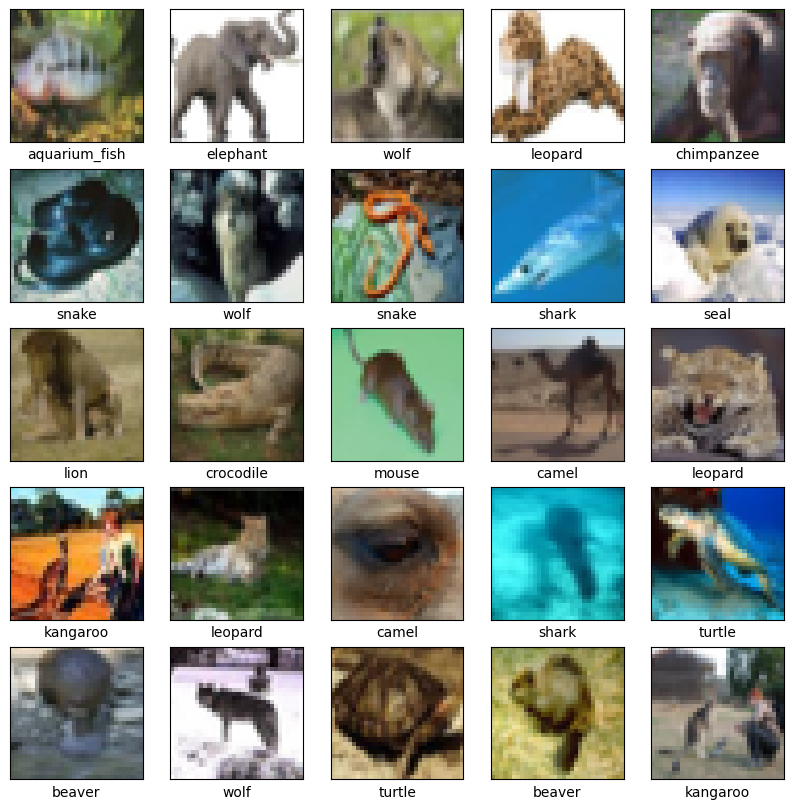

In [89]:
animal_classes = [1,3,4,15,21,27,30,31,34,38,42,43,44, 50, 72,73,78,88,93,97]
class_names = {
    1: 'aquarium_fish',
    3: 'bear',
    4: 'beaver',
    15: 'camel',
    21: 'chimpanzee',
    27: 'crocodile',
    30: 'dolphin',
    31: 'elephant',
    34: 'fox',
    38: 'kangaroo',
    42: 'leopard',
    43: 'lion',
    44: 'lizard',
    50: 'mouse',
    72: 'seal',
    73: 'shark',
    78: 'snake',
    88: 'tiger',
    93: 'turtle',
    97: 'wolf',
}

animal_filter = np.isin(y_train, animal_classes)
X_train_animals = X_train[animal_filter.flatten()]
y_train_animals = y_train[animal_filter.flatten()]

animal_filter = np.isin(y_test, animal_classes)
X_test_animals = X_test[animal_filter.flatten()]
y_test_animals = y_test[animal_filter.flatten()]

# normalize data
# X_train_animals = X_train_animals / 255.0
# X_test_animals = X_test_animals / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_animals[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_animals[i].item()])
plt.show()

In [90]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(32,32,3)),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(100)
# ])


# model = tf.keras.Sequential([
#   layers.Rescaling(1./255, input_shape=(32, 32, 3)),
#   layers.Conv2D(16, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(100)
# ])
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(32,32,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)
model = tf.keras.Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(100, name="outputs")
])


In [91]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [92]:
model.fit(X_train_animals, y_train_animals, epochs=100)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1103 - loss: 3.1226
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.2249 - loss: 2.4829
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2540 - loss: 2.3893
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2769 - loss: 2.2976
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3063 - loss: 2.2348
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.3147 - loss: 2.1825
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3348 - loss: 2.1399
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3647 - loss: 2.0643
Epoch 9/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3704 - loss: 2.0390
Epoch 10/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.3685 - loss: 2.0207
Epoch 11/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.3848 - loss: 1.9522
Epoch 12/100
313/313 ━━━━━━━━━

In [94]:
test_loss, test_accuracy = model.evaluate(X_test_animals, y_test_animals, verbose=2)
print(test_accuracy)

63/63 - 0s - 4ms/step - accuracy: 0.4810 - loss: 1.9687
0.48100000619888306
